In [86]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,9.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


# _______

#### Checking for null values

In [5]:
df.isna().sum()

product_id             3
product_name           3
category               3
discounted_price       3
actual_price           3
discount_percentage    3
rating                 3
rating_count           3
about_product          3
user_id                3
review_title           3
dtype: int64

In [6]:
df = df.dropna(axis=0, how='any') 

In [7]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
review_title           0
dtype: int64

In [8]:
df.duplicated().sum()

72

In [9]:
df.drop_duplicates(keep='first')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,9.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


# 1. Data Engineering

In [10]:
#cleaning the columns and rounding of the prices for better analysis

df['discounted_price'] = df['discounted_price'].replace('[^0-9.]', '', regex=True).astype(float).astype(int)
df['actual_price'] = df['actual_price'].replace('[^0-9.]', '', regex=True).astype(float).astype(int)
df['discount_percentage'] = df['discount_percentage'].round().astype(int)
df['rating_count'] = df['rating_count'].round().astype(int)

In [11]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,9,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   int32  
 4   actual_price         1462 non-null   int32  
 5   discount_percentage  1462 non-null   int32  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int32  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  review_title         1462 non-null   object 
dtypes: float64(1), int32(4), object(6)
memory usage: 114.2+ KB


In [75]:
df['user_id'] = range(1, len(df)+1)
df.insert(12, 'user_id', df.pop('user_id'))

### Assigning a code to each unique category using the cat.codes method to make visualization easy to understand

In [16]:
df['category_code'] = df['category'].astype('category').cat.codes
df.insert(2, 'category_code', df.pop('category_code'))

In [17]:
category_code = df['category_code'].value_counts()
print(category_code)

10     231
119     76
117     68
97      63
76      52
      ... 
60       1
46       1
83       1
199      1
185      1
Name: category_code, Length: 211, dtype: int64


### Added a new column to the DataFrame called after_discount which calculates the amount saved after applying a discount to the original price.

In [18]:
df['after_discount'] = df['actual_price'] - df['discounted_price']
df.insert(4, 'after_discount', df.pop('after_discount'))

In [19]:
df.head()

,product_name,category,category_code,discounted_price,after_discount,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
product_id,,,,,,,,,,,,
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,10,399,700,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,1,"Satisfied,Charging is really fast,Value for mo..."
B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,10,199,150,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...",2,"A Good Braided Cable for Your Type C Device,Go..."
B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,10,199,1700,1899,9,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,3,"Good speed for earlier versions,Good Product,W..."
B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,10,329,370,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,4,"Good product,Good one,Nice,Really nice product..."
B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,10,154,245,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,5,"As good as original,Decent,Good one for second..."


In [20]:
nltk.download('stopwords')
nltk.download('snowball_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


True

# Text preprocessing on the columns product_name, product_description, and reviews.
### Created a Snowball stemmer object for the English language.
### Created a set of stopwords for the English language.
### Defined a function called clean_text() that takes a string of text as input and performed the following operations:
### 1.Converting the text to lowercase.
### 2.Removing punctuation.
### 3.Removing numbers.
### 4.Removing stopwords using the set of stopwords created earlier.
### 5.Applied stemming using the Snowball stemmer created earlier.
### 6.Joining the stemmed words back into a single string.

In [21]:
# Create Snowball stemmer
stemmer = SnowballStemmer('english')

# Create set of stopwords
stopwords_set = set(stopwords.words('english'))

# Define function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = text.translate(str.maketrans('', '', string.digits))
    # Remove stopwords and apply stemming
    text = [stemmer.stem(word) for word in text.split() if word not in stopwords_set]
    # Join words back into a string
    text = ' '.join(text)
    return text

In [22]:
# Apply the clean_text function to the product name, description, and reviews columns
df['product_name'] = df['product_name'].apply(clean_text)
df['about_product'] = df['about_product'].apply(clean_text)
df['review_title'] = df['review_title'].apply(clean_text)

In [23]:
print(df['review_title'].iloc[0])

satisfiedcharg realli fastvalu moneyproduct reviewgood qualitygood productgood producta seem good


# Summary of Data Engineering
### 1.Cleaned the data by removing null values and ensuring consistency in the data
### 2.Changed the data types of columns where required to ensure appropriate data manipulation

### 3.Added a new column called "after_discount" which calculates the amount saved after applying a discount to the original price

### 4.Preprocessed the text data in the reviews, product name, and description columns using the Natural Language Toolkit (NLTK) library.

## Overall, these data engineering tasks helped me to clean and prepare the data for further analysis and modeling.

In [24]:
df.columns

Index(['product_name', 'category', 'category_code', 'discounted_price',
       'after_discount', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'about_product', 'user_id', 'review_title'],
      dtype='object')

# 2.Data Analytics

### Cateogory Analysis

In [26]:
df.head()

,product_name,category,category_code,discounted_price,after_discount,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
product_id,,,,,,,,,,,,
B07JW9H4J1,wayona nylon braid usb lightn fast charg data ...,Computers&Accessories|Accessories&Peripherals|...,10,399,700,1099,64,4.2,24269,high compat compat iphon xxsmaxxr iphon plusip...,1,satisfiedcharg realli fastvalu moneyproduct re...
B098NS6PVG,ambran unbreak w fast charg braid type c cabl ...,Computers&Accessories|Accessories&Peripherals|...,10,199,150,349,43,4.0,43994,compat type c enabl devic android smartphon mi...,2,good braid cabl type c devicegood qualiti prod...
B096MSW6CT,sounc fast phone charg cabl data sync usb cabl...,Computers&Accessories|Accessories&Peripherals|...,10,199,1700,1899,9,3.9,7928,【 fast charger data sync】with builtin safeti p...,3,good speed earlier versionsgood productwork go...
B08HDJ86NZ,boat deuc usb typec micro usb stress resist ta...,Computers&Accessories|Accessories&Peripherals|...,10,329,370,699,53,4.2,94363,boat deuc usb cabl compat smartphon tablet pc ...,4,good productgood onenicer nice productveri fir...
B08CF3B7N1,portron konnect l fast charg pin usb cabl char...,Computers&Accessories|Accessories&Peripherals|...,10,154,245,399,61,4.2,16905,charg sync function cabl come charg data sync ...,5,good originaldecentgood one secondari usebest ...


## Descriptive Statistics

In [27]:
df.describe()

,category_code,discounted_price,after_discount,actual_price,discount_percentage,rating,rating_count,user_id
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.00000
mean,95.205882,3129.982900,2323.105335,5453.088235,39.312585,4.096717,18307.376881,731.50000
std,60.528242,6950.547922,4608.569389,10884.467236,25.064109,0.289497,42766.096572,422.18736
min,0.000000,39.000000,0.000000,39.000000,0.000000,2.000000,2.000000,1.00000
25%,31.000000,325.000000,370.250000,800.000000,16.000000,4.000000,1191.500000,366.25000
50%,97.000000,799.000000,800.000000,1670.000000,42.000000,4.100000,5179.000000,731.50000
75%,141.000000,1999.000000,1959.000000,4321.250000,59.000000,4.300000,17342.250000,1096.75000
max,210.000000,77990.000000,61910.000000,139900.000000,94.000000,5.000000,426973.000000,1462.00000


### 1.On average, the discounted price is approximately 39% lower than the actual price.
### 2.The standard deviation of the discounted price is quite high compared to the mean, indicating a wide range of price discounts.
### 3.The minimum value for both actual price and discounted price is 39, which is the lowest-priced product in the dataset.
### 4.The maximum value for the actual price is 139,900, which is significantly higher than the 75th percentile value, indicating that there are some high-priced products in the dataset.
### 5.The maximum discount percentage is 94%, indicating that some products are heavily discounted.
### 6.The mean rating is 4.1 out of 5, which is a good rating.
### 7.The maximum number of rating count is 426,973, indicating that some products have a high number of ratings.

### _________

### Grouped the data by category and calculated the number of discounts, average discount percentage, and median discount percentage for each category.

In [87]:
discount_stats = df.groupby('category').agg({'discount_percentage': ['count', 'mean', 'median']})
discount_stats.columns = ['num_discounts', 'avg_discount_percentage', 'median_discount_percentage']
discount_stats

,num_discounts,avg_discount_percentage,median_discount_percentage
category,,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1,42.000000,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,2,78.500000,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,1,35.000000,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,2,29.500000,29.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,2,24.000000,24.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,2,44.500000,44.5
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,3,9.000000,9.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,1,55.000000,55.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,2,54.000000,54.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, B07JW9H4J1 to B01486F4G6
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1462 non-null   object 
 1   category             1462 non-null   object 
 2   category_code        1462 non-null   int16  
 3   discounted_price     1462 non-null   int32  
 4   after_discount       1462 non-null   int32  
 5   actual_price         1462 non-null   int32  
 6   discount_percentage  1462 non-null   int32  
 7   rating               1462 non-null   float64
 8   rating_count         1462 non-null   int32  
 9   about_product        1462 non-null   object 
 10  user_id              1462 non-null   int64  
 11  review_title         1462 non-null   object 
dtypes: float64(1), int16(1), int32(5), int64(1), object(4)
memory usage: 111.4+ KB


## Visualization

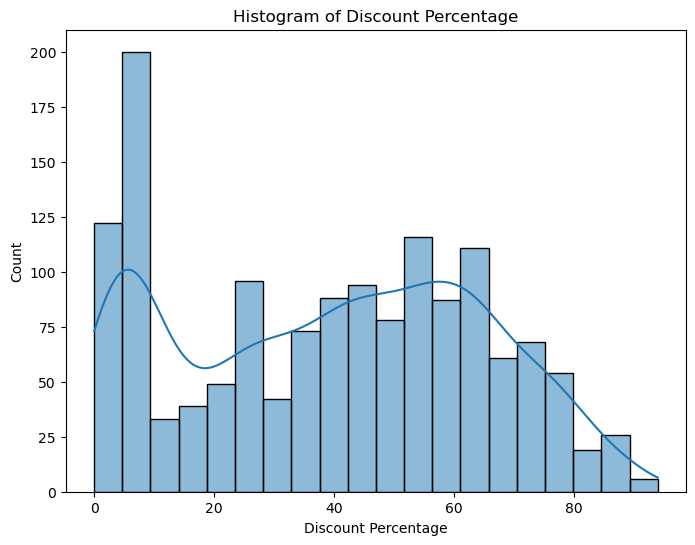

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df['discount_percentage'], bins=20, kde=True)
plt.title('Histogram of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

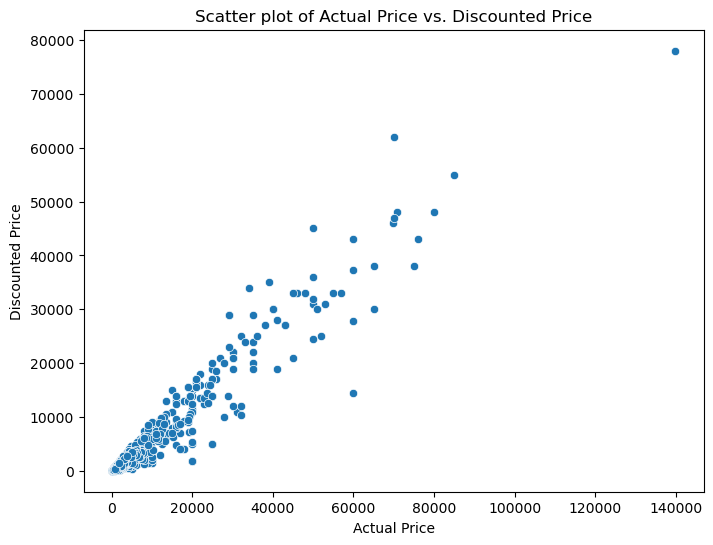

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Scatter plot of Actual Price vs. Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

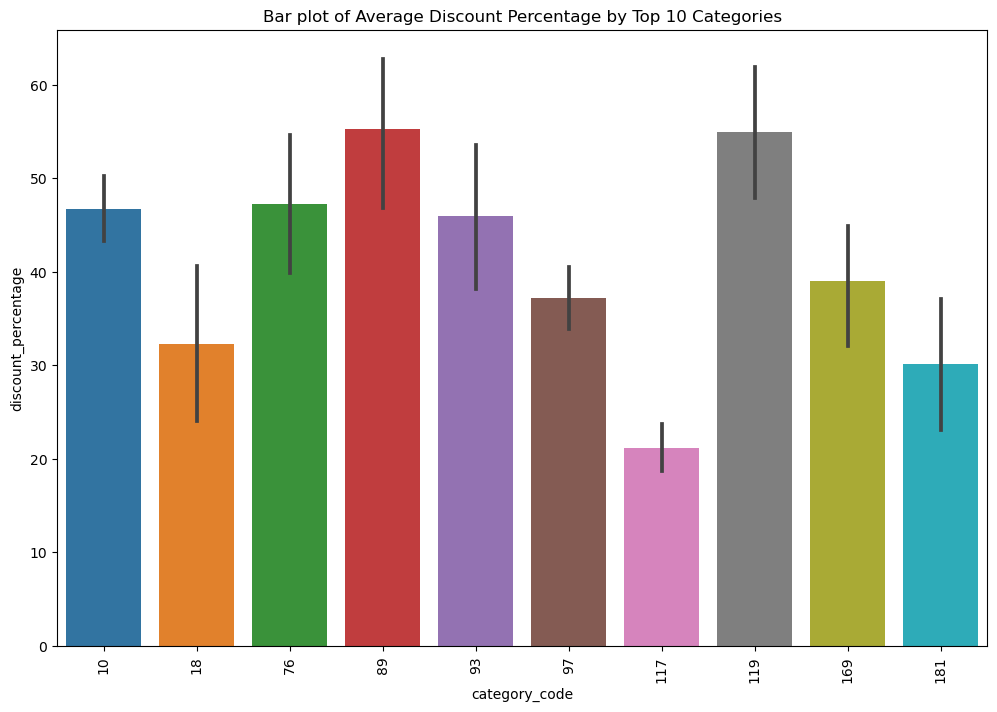

In [78]:
plt.figure(figsize=(12,8))
top_10_categories = df['category_code'].value_counts().head(10).index
sns.barplot(x='category_code', y='discount_percentage', data=df[df['category_code'].isin(top_10_categories)], estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Bar plot of Average Discount Percentage by Top 10 Categories')
plt.show()

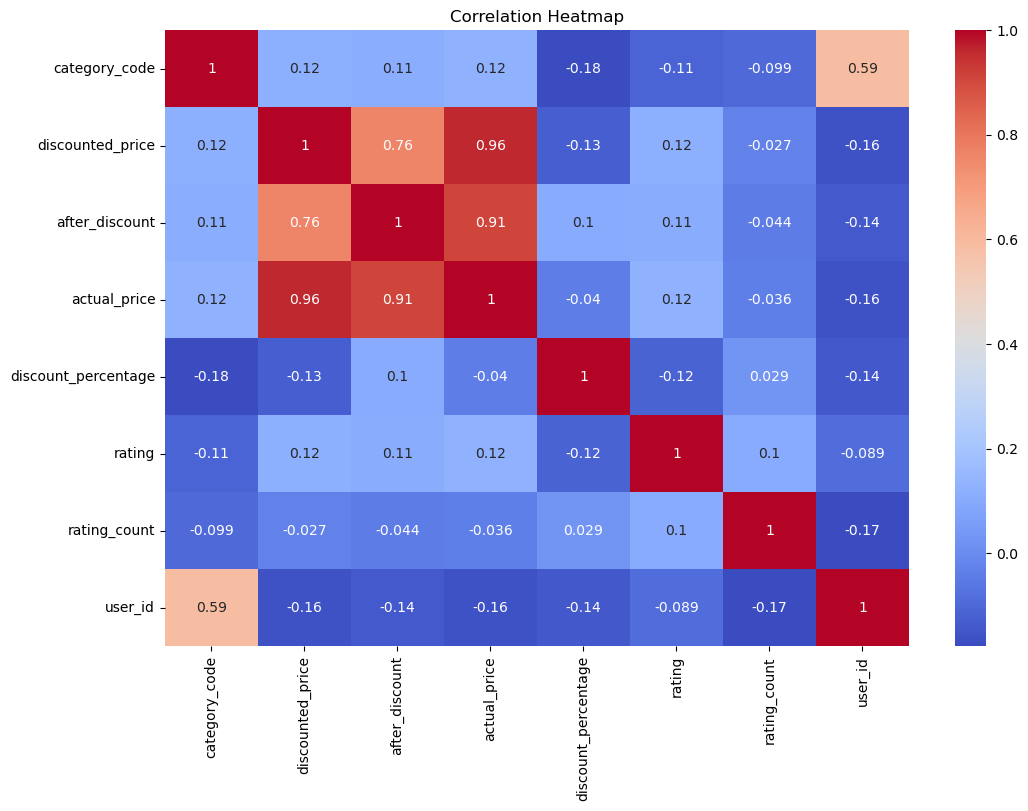

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

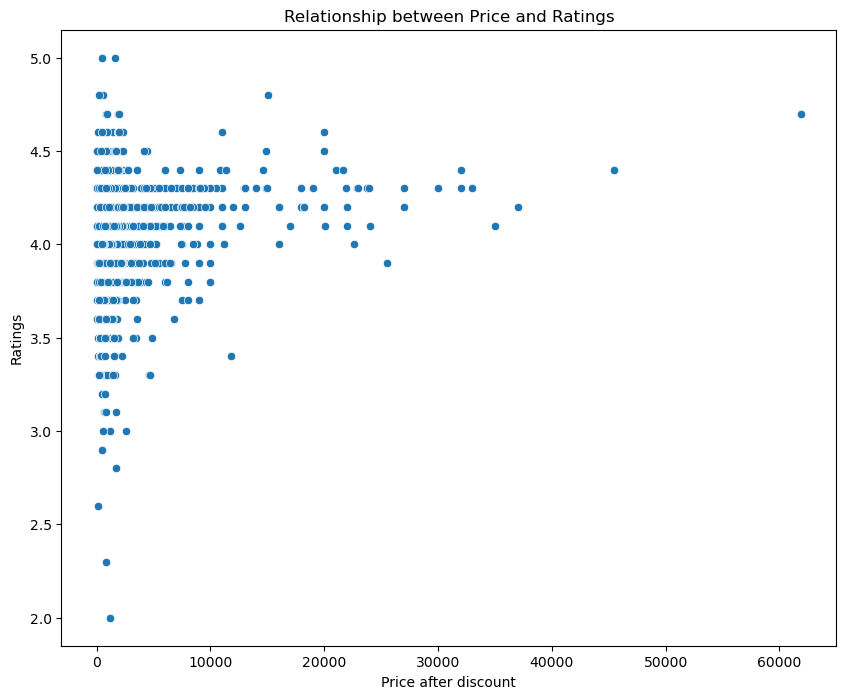

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='after_discount', y='rating', data=df)
plt.title('Relationship between Price and Ratings')
plt.xlabel('Price after discount')
plt.ylabel('Ratings')
plt.show()

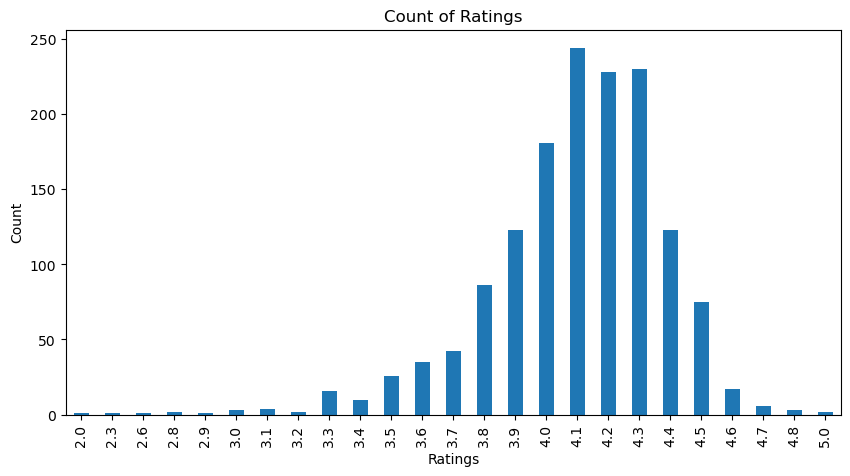

In [81]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Ratings',
          figsize=(10, 5))
ax.set_ylabel('Count')
ax.set_xlabel('Ratings')
plt.show()

### This chart indicates that most ratings are between 3.8 and 4.4, with a peak at 4.1, suggesting that most customers are satisfied with the products. 
### There are very few ratings below 3.8, indicating that customers are generally happy with the products they purchase. 

### __________

# 3.Data Science

In [36]:
df['index'] = range(1, len(df) + 1)
df.insert(0, 'index', df.pop('index'))

In [37]:
df.head()

,index,product_name,category,category_code,discounted_price,after_discount,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
product_id,,,,,,,,,,,,,
B07JW9H4J1,1,wayona nylon braid usb lightn fast charg data ...,Computers&Accessories|Accessories&Peripherals|...,10,399,700,1099,64,4.2,24269,high compat compat iphon xxsmaxxr iphon plusip...,1,satisfiedcharg realli fastvalu moneyproduct re...
B098NS6PVG,2,ambran unbreak w fast charg braid type c cabl ...,Computers&Accessories|Accessories&Peripherals|...,10,199,150,349,43,4.0,43994,compat type c enabl devic android smartphon mi...,2,good braid cabl type c devicegood qualiti prod...
B096MSW6CT,3,sounc fast phone charg cabl data sync usb cabl...,Computers&Accessories|Accessories&Peripherals|...,10,199,1700,1899,9,3.9,7928,【 fast charger data sync】with builtin safeti p...,3,good speed earlier versionsgood productwork go...
B08HDJ86NZ,4,boat deuc usb typec micro usb stress resist ta...,Computers&Accessories|Accessories&Peripherals|...,10,329,370,699,53,4.2,94363,boat deuc usb cabl compat smartphon tablet pc ...,4,good productgood onenicer nice productveri fir...
B08CF3B7N1,5,portron konnect l fast charg pin usb cabl char...,Computers&Accessories|Accessories&Peripherals|...,10,154,245,399,61,4.2,16905,charg sync function cabl come charg data sync ...,5,good originaldecentgood one secondari usebest ...


In [38]:
example = df['review_title'][62]
print(example)

wellpric productlenthi cordproduct work expectedlengthi cabl work car dashcamproduct okay give rs give starsmislead length rest finegood productgood


In [39]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['wellpric',
 'productlenthi',
 'cordproduct',
 'work',
 'expectedlengthi',
 'cabl',
 'work',
 'car',
 'dashcamproduct',
 'okay']

###  Used nltk.pos_tag(tokens) function to tag each token in a given list of tokens with its part of speech (POS) category, such as noun, verb, adjective, adverb, etc.

In [41]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('wellpric', 'JJ'),
 ('productlenthi', 'NN'),
 ('cordproduct', 'NN'),
 ('work', 'NN'),
 ('expectedlengthi', 'NN'),
 ('cabl', 'NN'),
 ('work', 'NN'),
 ('car', 'NN'),
 ('dashcamproduct', 'NN'),
 ('okay', 'RB')]

### Function correctly identified 
### "wellpric" as an adjective (JJ), 
### "productlenthi" and "cordproduct" as nouns (NN), 
### "expectedlengthi", "work", "cabl", "car", and "dashcamproduct" as nouns (NN), and 
### "okay" as an adverb (RB).

In [43]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  wellpric/JJ
  productlenthi/NN
  cordproduct/NN
  work/NN
  expectedlengthi/NN
  cabl/NN
  work/NN
  car/NN
  dashcamproduct/NN
  okay/RB
  give/JJ
  rs/NN
  give/VBP
  starsmislead/NN
  length/NN
  rest/NN
  finegood/NN
  productgood/NN)


### Used (nltk) to extract named entities from a tagged text, where each word in the text is assigned a part of speech tag. 

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Calculating the polarity score of a sentence,

In [45]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [46]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [47]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.2263}

In [48]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_title']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1462 [00:00<?, ?it/s]

In [49]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [50]:
vaders.head()

,index,neg,neu,pos,compound,product_name,category,category_code,discounted_price,after_discount,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
0,1,0.0,0.756,0.244,0.4404,wayona nylon braid usb lightn fast charg data ...,Computers&Accessories|Accessories&Peripherals|...,10,399,700,1099,64,4.2,24269,high compat compat iphon xxsmaxxr iphon plusip...,1,satisfiedcharg realli fastvalu moneyproduct re...
1,2,0.0,0.847,0.153,0.4404,ambran unbreak w fast charg braid type c cabl ...,Computers&Accessories|Accessories&Peripherals|...,10,199,150,349,43,4.0,43994,compat type c enabl devic android smartphon mi...,2,good braid cabl type c devicegood qualiti prod...
2,3,0.0,0.637,0.363,0.6908,sounc fast phone charg cabl data sync usb cabl...,Computers&Accessories|Accessories&Peripherals|...,10,199,1700,1899,9,3.9,7928,【 fast charger data sync】with builtin safeti p...,3,good speed earlier versionsgood productwork go...
3,4,0.0,0.500,0.500,0.8750,boat deuc usb typec micro usb stress resist ta...,Computers&Accessories|Accessories&Peripherals|...,10,329,370,699,53,4.2,94363,boat deuc usb cabl compat smartphon tablet pc ...,4,good productgood onenicer nice productveri fir...
4,5,0.0,0.791,0.209,0.4404,portron konnect l fast charg pin usb cabl char...,Computers&Accessories|Accessories&Peripherals|...,10,154,245,399,61,4.2,16905,charg sync function cabl come charg data sync ...,5,good originaldecentgood one secondari usebest ...


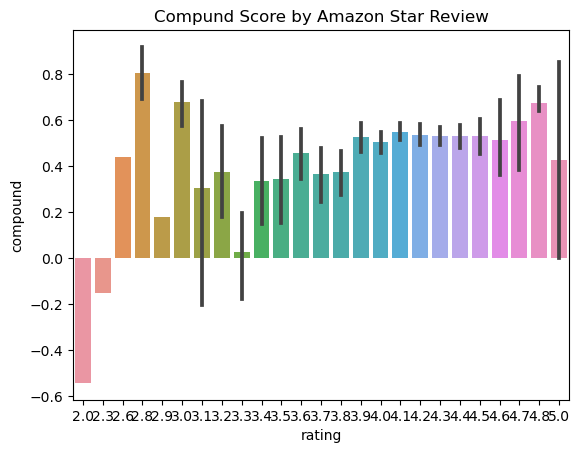

In [51]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

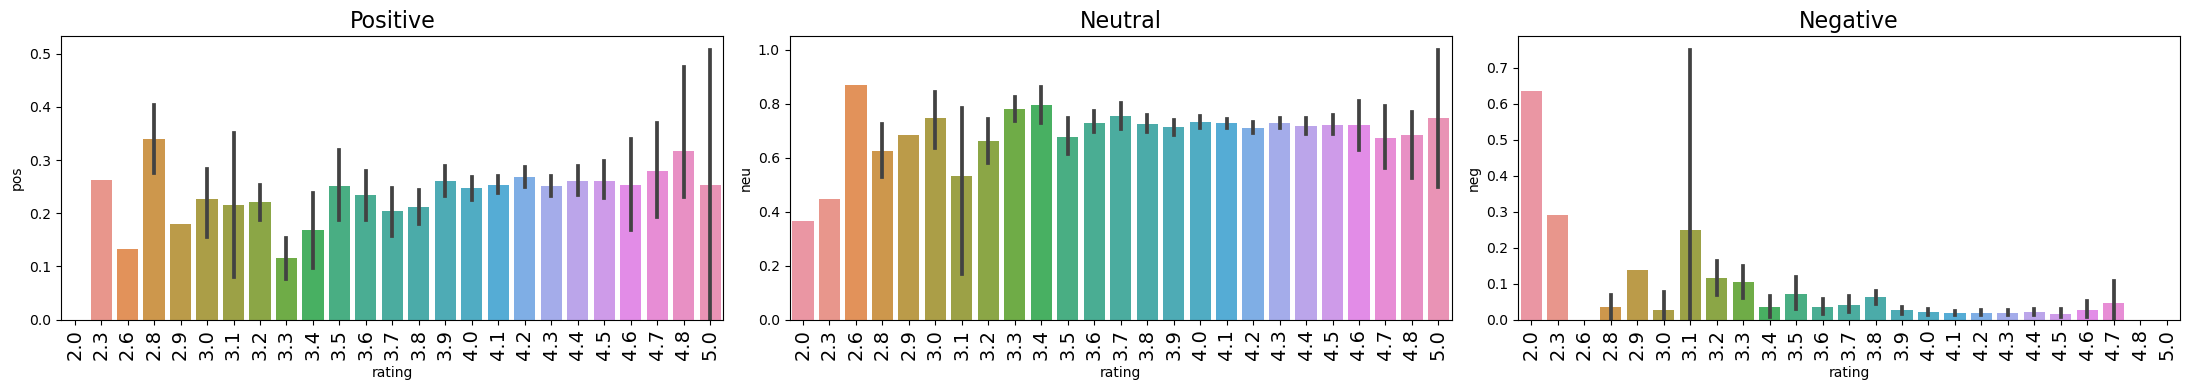

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(22, 4))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive', fontsize=16)
axs[1].set_title('Neutral', fontsize=16)
axs[2].set_title('Negative', fontsize=16)
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)

plt.tight_layout()
plt.show()

In [53]:
!pip install transformers

In [54]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [55]:
pip install torch

### 1.Used pre-trained model from the Hugging Face Transformers library.
### 2.Loaded the tokenizer for the pre-trained model specified in MODEL.

In [56]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [57]:
print(example)
sia.polarity_scores(example)

wellpric productlenthi cordproduct work expectedlengthi cabl work car dashcamproduct okay give rs give starsmislead length rest finegood productgood


{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.2263}

In [58]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.011891709, 'roberta_neu': 0.22568521, 'roberta_pos': 0.7624231}


In [59]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [60]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_title']
        myid = row['index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1462 [00:00<?, ?it/s]

In [61]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'index'})
results_df = results_df.merge(df, how='left')

In [62]:
results_df.columns

Index(['index', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name', 'category',
       'category_code', 'discounted_price', 'after_discount', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'review_title'],
      dtype='object')

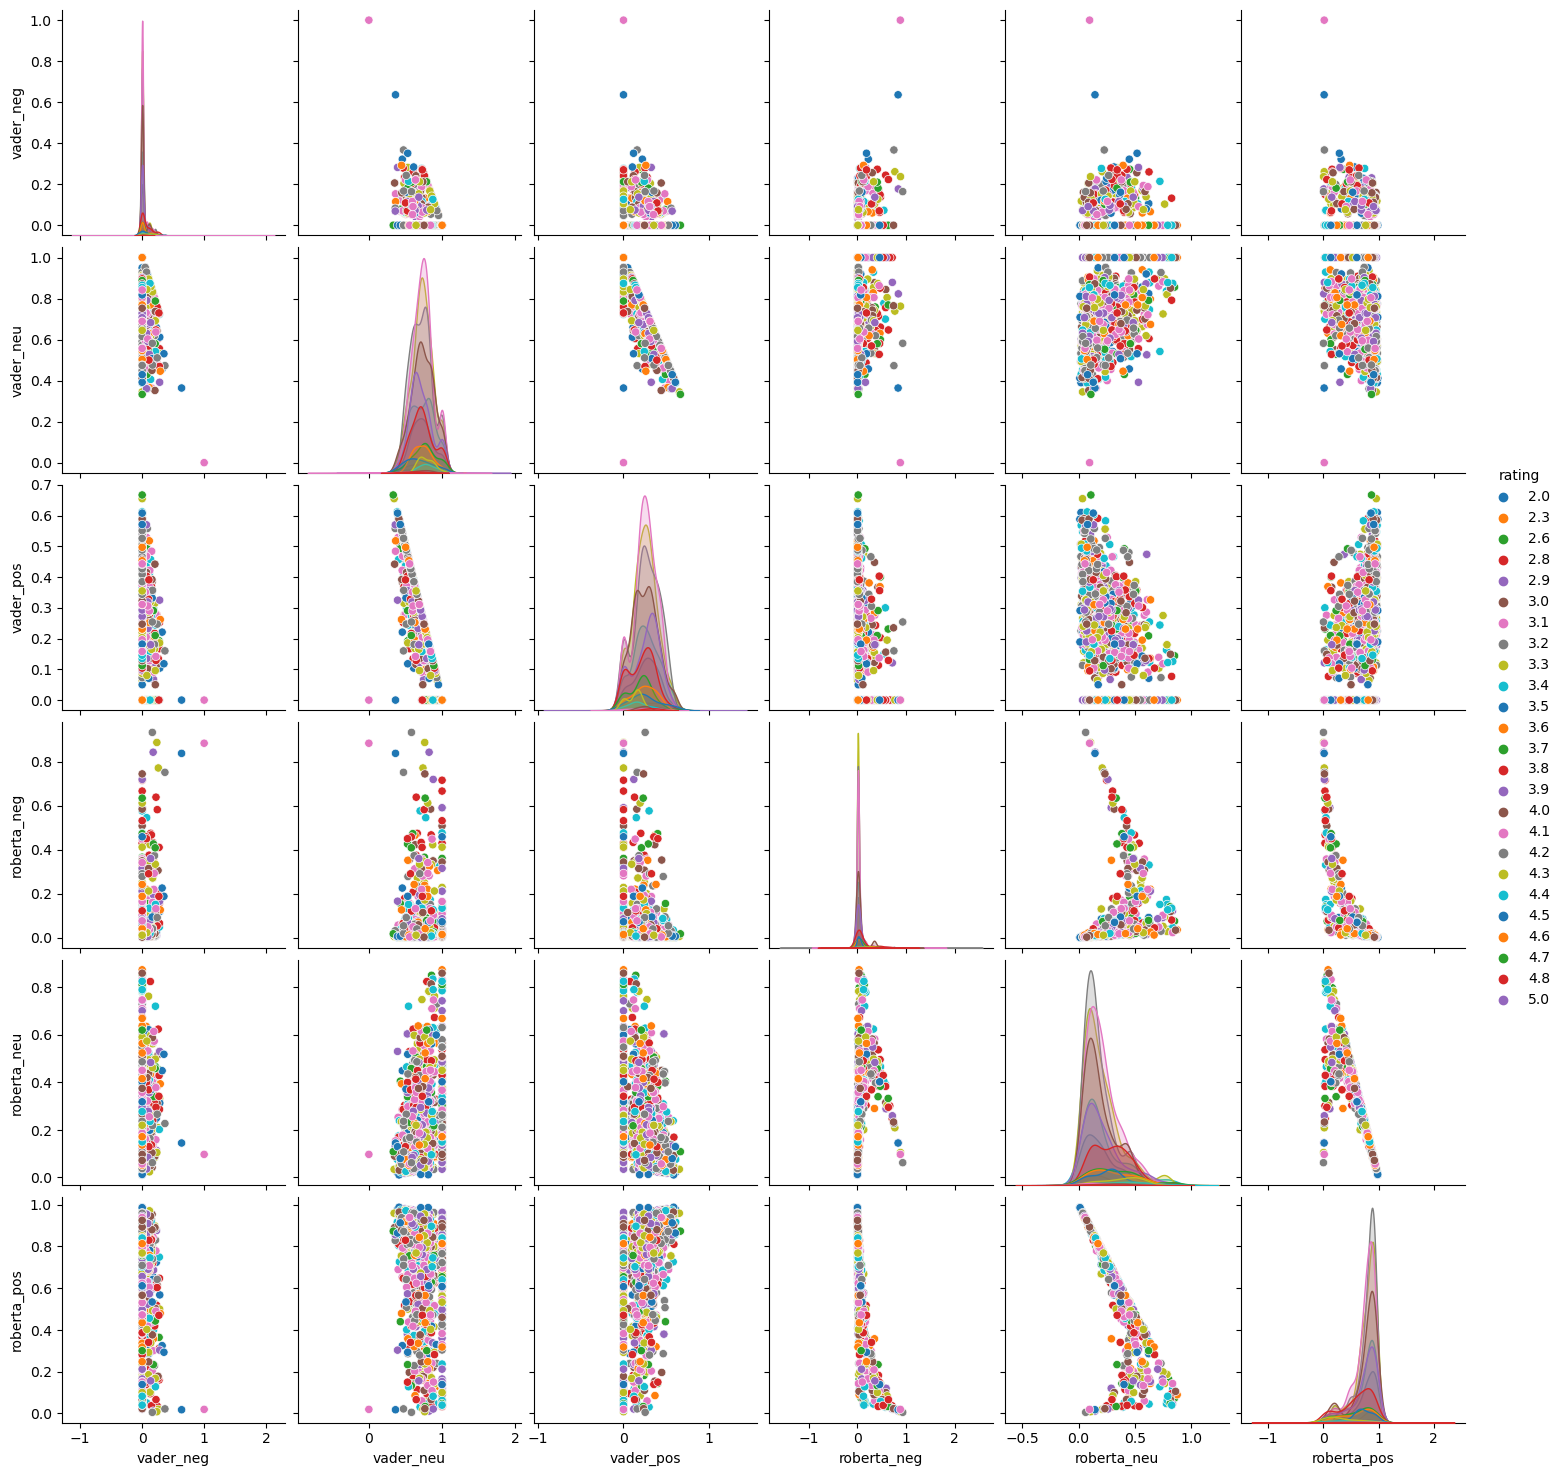

In [63]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [64]:
results_df.query('rating == 2') \
    .sort_values('roberta_pos', ascending=False)['review_title'].values[0]

'bad qualityamaz product'

In [65]:
results_df.query('rating == 3') \
    .sort_values('vader_pos', ascending=False)['review_title'].values[0]

'worth hypegudr use 😃product good press seal lower part sealer get automaticallyok product generat enough heat packnot markpocket friend effect easi useaverag'

### 1.The code above queries the results_df DataFrame to retrieve review titles with the highest positive sentiment score for a specific rating.
### 2.The first line retrieves the review title with the highest positive sentiment score for a rating of 2.
### 3.It sorts the DataFrame by the roberta_pos column in descending order to get the top row of the DataFrame.
### 4.The second line retrieves the review title with the highest positive sentiment score for a rating of 3.
### 5.It sorts the DataFrame by the vader_pos column in descending order to get the top row of the DataFrame.

In [66]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [67]:
sent_pipeline('I love the product!')

[{'label': 'POSITIVE', 'score': 0.9998842477798462}]

In [68]:
sent_pipeline('The usb cable was damaged')

[{'label': 'NEGATIVE', 'score': 0.9996206760406494}]

# Summary of the steps I have taken for the sentiment analysis.

### 1.Imported necessary packages such as pandas, seaborn, nltk, transformers, etc.
### 2.read in a dataset containing customer reviews of various products using pandas.
### 3.Performed exploratory data analysis on the dataset to gain insights and visualized the distribution of ratings using seaborn.
### 4.Used the nltk library to perform natural language processing tasks such as tokenization, part-of-speech tagging, and named entity recognition on the review text.
### 5.Used the Vader sentiment analyzer from nltk.sentiment library to compute sentiment scores for each review text.
### 6.Used the transformers library to load and use a pre-trained sentiment analysis model for predicting the sentiment of the review text.
### 7.Visualized the sentiment scores and the distribution of positive, negative, and neutral sentiment for each rating using seaborn.
### 8.Retrieved the review title with the highest positive sentiment score for a specific rating by querying the results dataframe.
## Finally, used the transformers library again to create a sentiment analysis pipeline for predicting the sentiment of new text.